___
# Ciência dos Dados - PROJETO 1

## Bruno Arruda Camargo Paulino Costa

## Progresso do Acesso à TV

___
## Introdução

Esta análise tem o objetivo de avaliar os dados do PNAD no período de 2013-2015 e, apartir destes, concluir qual região e área obtiveram o maior progresso na disponibilização de serviços televisivos; Além de exibir possíveis causas para o resultado aqui obtido.


___
## Imports

In [83]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [84]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\brune\OneDrive\Documentos\PythonScripts


___
## Análise 2014

In [85]:
dados2014=pd.read_csv('DOM2014.csv',sep=',')

dados2014.loc[(dados2014.UF<30),"Regiao"] = "Nordeste"
dados2014.loc[(dados2014.UF>=31),"Regiao"] = "Sudeste"

dados2014.loc[(dados2014.V4105<4),"Area"] = "Urbana"
dados2014.loc[(dados2014.V4105>=4),"Area"] = "Rural"

dados2014.V0202 = dados2014.V0202.astype('category')
dados2014.V0226 = dados2014.V0226.astype('category')
dados2014.V02272 = dados2014.V02272.astype('category')
dados2014.V02273 = dados2014.V02273.astype('category')
dados2014.V02274 = dados2014.V02274.astype('category')
dados2014.Area = dados2014.Area.astype('category')
dados2014.Regiao = dados2014.Regiao.astype('category')
dados2014.V4620 = dados2014.V4620.astype('object')
dados2014.V4621 = dados2014.V4621.astype('object')


dados2014.V0202.cat.categories = (["Casa", "Apartamento","Cômodo"])
dados2014.V0226.cat.categories = (["Sim", "Não"])
dados2014.V02272.cat.categories = (["Sim", "Não"])
dados2014.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2014.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2014 = dados2014[pd.notnull(dados2014["V0226"])]

vt1 = dados2014.Regiao.value_counts(sort=False) #Regiao
vt2 = dados2014.Area.value_counts(sort=False) #Area
vt3 = dados2014.V0202.value_counts(sort=False) #Domicilio
vt4 = dados2014.V0226.value_counts(sort=False) #TV Cor
vt5 = dados2014.V02272.value_counts(sort=False) #TV Assinada
vt6 = dados2014.V02273.value_counts(sort=False) #TV Digital
vt7 = dados2014.V02274.value_counts(sort=False) #TV Parabólica

dados2014.rename(columns={"V0101":"Ano","V0202":"Tipo de Domicílio","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Nº Residentes","V4621":"Renda per Capita","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2014.loc[21431:110539,["Ano","Região","Tipo de Domicílio","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Nº Residentes","Renda per Capita"]])


,Ano,Região,Tipo de Domicílio,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Nº Residentes,Renda per Capita
21431,2014,Nordeste,Casa,Sim,Não,Sim,Sim,Urbana,3,833
21432,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,3,500
21434,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,3,241
21435,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,3,833
21436,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,2,1225
21437,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,6,307
21438,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,7,124
21439,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,2,238
21440,2014,Nordeste,Casa,Sim,Não,Sim,Sim,Urbana,4,186
21441,2014,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,4,219


___
## Análise 2015

In [86]:
dados2015=pd.read_csv('DOM2015.csv',sep=',')

dados2015.loc[(dados2015.UF<30),"Regiao"] = "Nordeste"
dados2015.loc[(dados2015.UF>=31),"Regiao"] = "Sudeste"

dados2015.loc[(dados2015.V4105<4),"Area"] = "Urbana"
dados2015.loc[(dados2015.V4105>=4),"Area"] = "Rural"

dados2015.V0202 = dados2015.V0202.astype('category')
dados2015.V0226 = dados2015.V0226.astype('category')
dados2015.V02272 = dados2015.V02272.astype('category')
dados2015.V02273 = dados2015.V02273.astype('category')
dados2015.V02274 = dados2015.V02274.astype('category')
dados2015.Area = dados2015.Area.astype('category')
dados2015.Regiao = dados2015.Regiao.astype('category')
dados2015.V4620 = dados2015.V4620.astype('object')
dados2015.V4621 = dados2015.V4621.astype('object')


dados2015.V0202.cat.categories = (["Casa", "Apartamento","Cômodo"])
dados2015.V0226.cat.categories = (["Sim", "Não"])
dados2015.V02272.cat.categories = (["Sim", "Não"])
dados2015.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2015.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2015 = dados2015[pd.notnull(dados2015["V0226"])]

ut1 = dados2015.Regiao.value_counts(sort=False) #Regiao
ut2 = dados2015.Area.value_counts(sort=False) #Area
ut3 = dados2015.V0202.value_counts(sort=False) #Domicilio
ut4 = dados2015.V0226.value_counts(sort=False) #TV Cor
ut5 = dados2015.V02272.value_counts(sort=False) #TV Assinada
ut6 = dados2015.V02273.value_counts(sort=False) #TV Digital
ut7 = dados2015.V02274.value_counts(sort=False) #TV Parabólica

dados2015.rename(columns={"V0101":"Ano","V0202":"Tipo de Domicílio","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Nº Residentes","V4621":"Renda per Capita","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2015.loc[21442:110421,["Ano","Região","Tipo de Domicílio","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Nº Residentes","Renda per Capita"]])


,Ano,Região,Tipo de Domicílio,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Nº Residentes,Renda per Capita
21442,2015,Nordeste,Casa,Sim,Não,Não,Não,Urbana,1,1576
21443,2015,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,2,394
21444,2015,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,5,436
21447,2015,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,12,62
21448,2015,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,7,187
21449,2015,Nordeste,Casa,Sim,Não,Não Sabe,Sim,Urbana,3,244
21450,2015,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,3,151
21451,2015,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,1,1900
21452,2015,Nordeste,Casa,Sim,Sim,Não,Não,Urbana,2,2295
21454,2015,Nordeste,Casa,Sim,Não,Não,Sim,Urbana,4,419


___
## Gráficos 2014

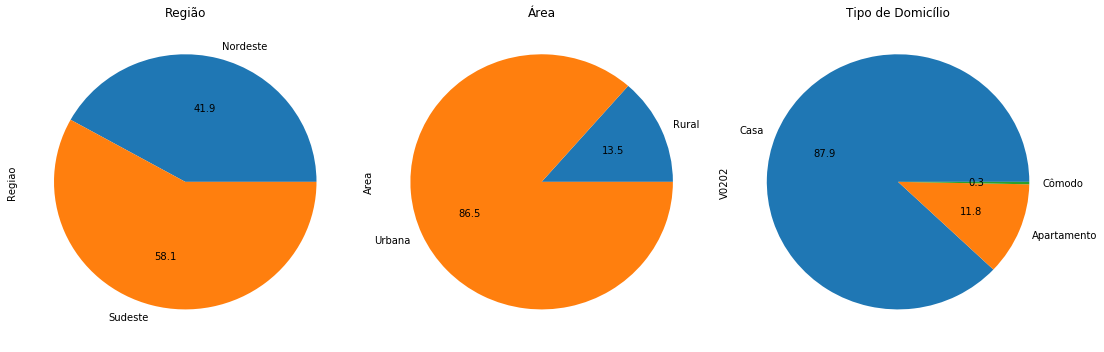

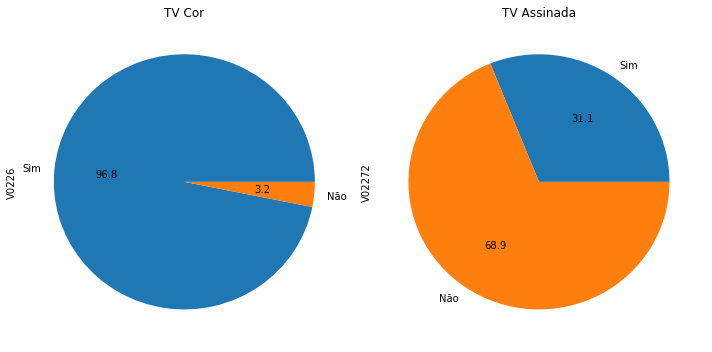

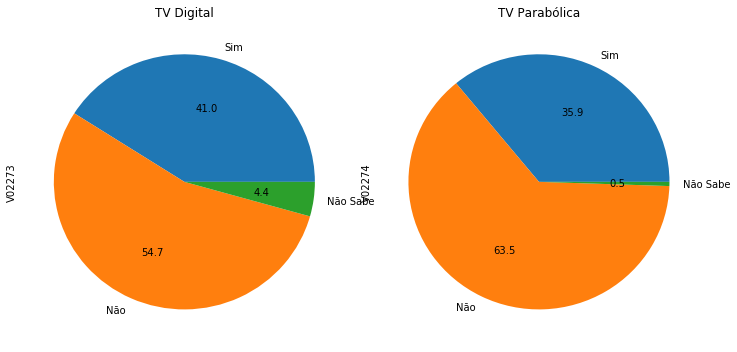

In [87]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = vt1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(132)
plot = vt2.plot(kind='pie',title='Área',autopct='%.1f')

plt.subplot(133)
plot = vt3.plot(kind='pie',title='Tipo de Domicílio',autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = vt4.plot(kind='pie',title='TV Cor',autopct='%.1f')

plt.subplot(122)
plot = vt5.plot(kind='pie',title='TV Assinada',autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = vt6.plot(kind='pie',title='TV Digital',autopct='%.1f')

plt.subplot(122)
plot = vt7.plot(kind='pie',title='TV Parabólica',autopct='%.1f')

plt.tight_layout()
plt.show()

___
## Gráficos 2015

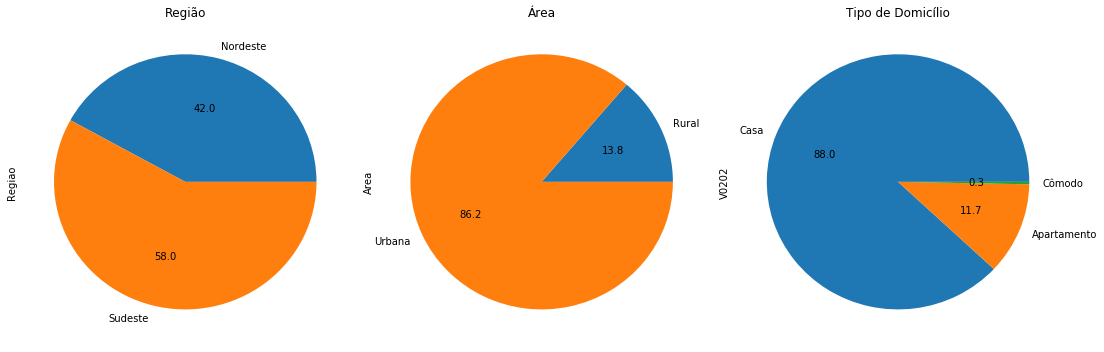

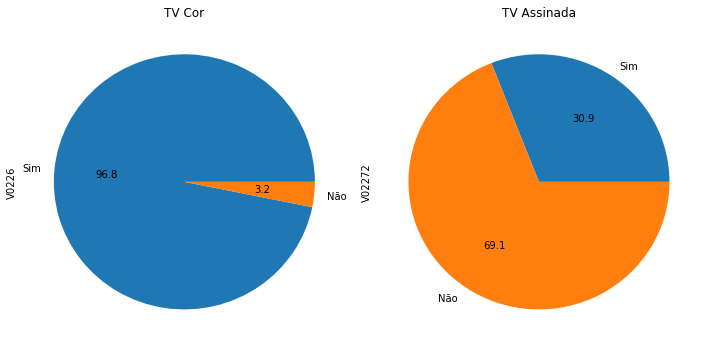

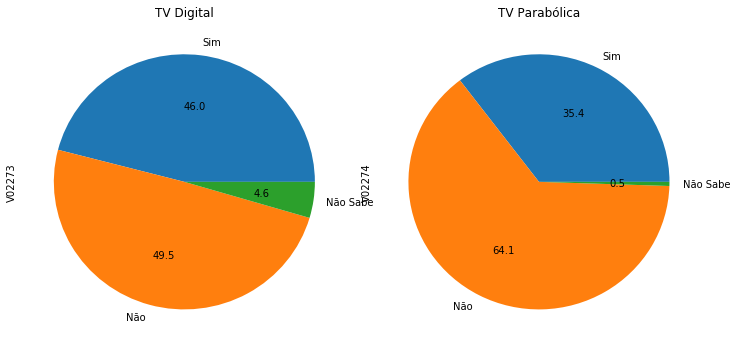

In [88]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(132)
plot = ut2.plot(kind='pie',title='Área',autopct='%.1f')

plt.subplot(133)
plot = ut3.plot(kind='pie',title='Tipo de Domicílio',autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = ut4.plot(kind='pie',title='TV Cor',autopct='%.1f')

plt.subplot(122)
plot = ut5.plot(kind='pie',title='TV Assinada',autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = ut6.plot(kind='pie',title='TV Digital',autopct='%.1f')

plt.subplot(122)
plot = ut7.plot(kind='pie',title='TV Parabólica',autopct='%.1f')

plt.tight_layout()
plt.show()

___
## Cruzando Dados 2014

In [89]:
xt=pd.crosstab(dados2014.Área, dados2014.Região, margins=True, rownames=['Área'], colnames=['Região'], normalize=True)*100
xt

Região,Nordeste,Sudeste,All
Área,,,
Rural,8.523038,5.025392,13.548431
Urbana,33.388918,53.062651,86.451569
All,41.911957,58.088043,100.000000


In [90]:
xt1=pd.crosstab(dados2014.TVCor, dados2014.Região, margins=True, rownames=['TV Cor'], colnames=['Região'], normalize=True)*100
xt1

Região,Nordeste,Sudeste,All
TV Cor,,,
Sim,40.063333,56.774215,96.837549
Não,1.848623,1.313828,3.162451
All,41.911957,58.088043,100.000000


In [91]:
xt2=pd.crosstab(dados2014.TVAssinada, dados2014.Região, margins=True, rownames=['TV Assinada'], colnames=['Região'], normalize=True)*100
xt2

Região,Nordeste,Sudeste,All
TV Assinada,,,
Sim,8.217787,22.857862,31.075649
Não,33.163739,35.760612,68.924351
All,41.381526,58.618474,100.000000


In [92]:
xt3=pd.crosstab(dados2014.TVDigital, dados2014.Região, margins=True, rownames=['TV Digital'], colnames=['Região'], normalize=True)*100
xt3

Região,Nordeste,Sudeste,All
TV Digital,,,
Sim,14.521128,26.452330,40.973458
Não,25.421742,29.244554,54.666296
Não Sabe,1.438655,2.921590,4.360246
All,41.381526,58.618474,100.000000


In [93]:
xt4=pd.crosstab(dados2014.TVParabólica, dados2014.Região, margins=True, rownames=['TV Parabólica'], colnames=['Região'], normalize=True)*100
xt4

Região,Nordeste,Sudeste,All
TV Parabólica,,,
Sim,17.520859,18.424685,35.945545
Não,23.770371,39.757070,63.527440
Não Sabe,0.090296,0.436719,0.527015
All,41.381526,58.618474,100.000000


In [94]:
bt1=pd.crosstab(dados2014.TVCor, dados2014.Área, margins=True, rownames=['TV Cor'], colnames=['Área'], normalize=True)*100
at1

Área,Rural,Urbana,All
TV Cor,,,
Sim,12.541560,84.275644,96.817204
Não,1.245738,1.937058,3.182796
All,13.787298,86.212702,100.000000


In [95]:
bt2=pd.crosstab(dados2014.TVAssinada, dados2014.Área, margins=True, rownames=['TV Assinada'], colnames=['Área'], normalize=True)*100
at2

Área,Rural,Urbana,All
TV Assinada,,,
Sim,1.126788,29.816470,30.943257
Não,11.858016,57.198727,69.056743
All,12.984804,87.015196,100.000000


In [96]:
bt3=pd.crosstab(dados2014.TVDigital, dados2014.Área, margins=True, rownames=['TV Digital'], colnames=['Área'], normalize=True)*100
at3

Área,Rural,Urbana,All
TV Digital,,,
Sim,2.305311,43.651845,45.957156
Não,9.803492,39.682220,49.485711
Não Sabe,0.876001,3.681132,4.557133
All,12.984804,87.015196,100.000000


In [97]:
bt4=pd.crosstab(dados2014.TVParabólica, dados2014.Área, margins=True, rownames=['TV Parabólica'], colnames=['Área'], normalize=True)*100
at4

Área,Rural,Urbana,All
TV Parabólica,,,
Sim,9.920993,25.429451,35.350444
Não,3.048027,61.083295,64.131321
Não Sabe,0.015784,0.502451,0.518235
All,12.984804,87.015196,100.000000


___
## Cruzando Dados 2015

In [98]:
ct=pd.crosstab(dados2015.Área, dados2015.Região, margins=True, rownames=['Área'], colnames=['Região'], normalize=True)*100
ct

Região,Nordeste,Sudeste,All
Área,,,
Rural,8.739722,5.047576,13.787298
Urbana,33.231860,52.980842,86.212702
All,41.971582,58.028418,100.000000


In [99]:
ct1=pd.crosstab(dados2015.TVCor, dados2015.Região, margins=True, rownames=['TV Cor'], colnames=['Região'], normalize=True)*100
ct1

Região,Nordeste,Sudeste,All
TV Cor,,,
Sim,40.065136,56.752068,96.817204
Não,1.906446,1.276350,3.182796
All,41.971582,58.028418,100.000000


In [100]:
ct2=pd.crosstab(dados2015.TVAssinada, dados2015.Região, margins=True, rownames=['TV Assinada'], colnames=['Região'], normalize=True)*100
ct2

Região,Nordeste,Sudeste,All
TV Assinada,,,
Sim,8.087442,22.855815,30.943257
Não,33.305566,35.751177,69.056743
All,41.393008,58.606992,100.000000


In [101]:
ct3=pd.crosstab(dados2015.TVDigital, dados2015.Região, margins=True, rownames=['TV Digital'], colnames=['Região'], normalize=True)*100
ct3

Região,Nordeste,Sudeste,All
TV Digital,,,
Sim,16.114380,29.842776,45.957156
Não,23.660789,25.824923,49.485711
Não Sabe,1.617839,2.939294,4.557133
All,41.393008,58.606992,100.000000


In [102]:
ct4=pd.crosstab(dados2015.TVParabólica, dados2015.Região, margins=True, rownames=['TV Parabólica'], colnames=['Região'], normalize=True)*100
ct4

Região,Nordeste,Sudeste,All
TV Parabólica,,,
Sim,17.401636,17.948808,35.350444
Não,23.892284,40.239037,64.131321
Não Sabe,0.099087,0.419147,0.518235
All,41.393008,58.606992,100.000000


In [103]:
at1=pd.crosstab(dados2015.TVCor, dados2015.Área, margins=True, rownames=['TV Cor'], colnames=['Área'], normalize=True)*100
at1

Área,Rural,Urbana,All
TV Cor,,,
Sim,12.541560,84.275644,96.817204
Não,1.245738,1.937058,3.182796
All,13.787298,86.212702,100.000000


In [104]:
at2=pd.crosstab(dados2015.TVAssinada, dados2015.Área, margins=True, rownames=['TV Assinada'], colnames=['Área'], normalize=True)*100
at2

Área,Rural,Urbana,All
TV Assinada,,,
Sim,1.126788,29.816470,30.943257
Não,11.858016,57.198727,69.056743
All,12.984804,87.015196,100.000000


In [105]:
at3=pd.crosstab(dados2015.TVDigital, dados2015.Área, margins=True, rownames=['TV Digital'], colnames=['Área'], normalize=True)*100
at3

Área,Rural,Urbana,All
TV Digital,,,
Sim,2.305311,43.651845,45.957156
Não,9.803492,39.682220,49.485711
Não Sabe,0.876001,3.681132,4.557133
All,12.984804,87.015196,100.000000


In [106]:
at4=pd.crosstab(dados2015.TVParabólica, dados2015.Área, margins=True, rownames=['TV Parabólica'], colnames=['Área'], normalize=True)*100
at4

Área,Rural,Urbana,All
TV Parabólica,,,
Sim,9.920993,25.429451,35.350444
Não,3.048027,61.083295,64.131321
Não Sabe,0.015784,0.502451,0.518235
All,12.984804,87.015196,100.000000


___
## Análise 2013

___
## Conclusão 

Descreva aqui suas conclusões!

## 